In [1]:
# !pip install opencv-python transformers accelerate
from diffusers import StableDiffusionPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.utils import load_image
import numpy as np
import torch

import cv2
from PIL import Image

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5"
)

# speed up diffusion process with faster scheduler and memory optimization
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

generator = torch.manual_seed(100)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [2]:
from unet import UNet2DConditionModel 
statedictpipe=pipe.unet.state_dict()
new_unet=UNet2DConditionModel()

In [3]:
new_unet.load_state_dict(statedictpipe)
pipe.unet=new_unet

In [4]:
import ptp_utils_text as ptp_utils
def run_and_display(pipe,prompts, negative_prompts, latent=None, run_baseline=False, generator=None,   results_dir='results'):

    images, x_t, all_list_encoder, all_list_decoder= ptp_utils.text2image_ldm_stable(pipe, prompts, negative_prompts, latent=latent, num_inference_steps=50, guidance_scale=7.5, generator=generator,low_resource=False)

    # ptp_utils.view_images(images,results_dir=results_dir)
    return images, x_t, all_list_encoder, all_list_decoder

In [5]:
prompts=["An astronaut riding an horse"]
negative_prompts=["Bad quality, bad anatomy"]

In [6]:
# import nump
from PIL import Image
from matplotlib import pyplot as plt
def save_image(imagea, loc):
    # if image.shape[1]>=64:
        imagea=imagea-imagea.min()
        imagea=imagea/imagea.max()
        imagea = imagea[0].cpu().cpu().numpy()
        # image=(image-np.min(image))(np.max(image)-np.min(image))
        imagea = (imagea * 255).astype(np.uint8)
        imagea=Image.fromarray(imagea)
        imagea=imagea.resize((256,256))
        image_array = np.array(imagea)
        print(np.shape(image_array))
        print(loc)
        # Create a heatmap from the array
        plt.imshow(image_array, cmap='viridis')

        # Remove axes and save the heatmap
        plt.axis('off')
        plt.savefig(loc, bbox_inches='tight', pad_inches=0)
        return imagea
    # return None
    # return None

  0%|          | 0/50 [00:00<?, ?it/s]

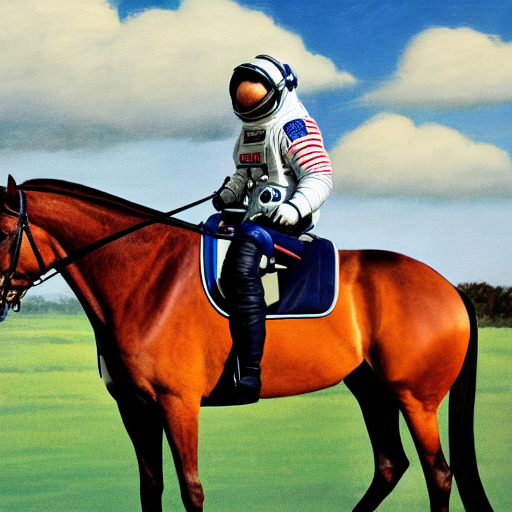

In [14]:
pipe = pipe.to("cuda")
# g_cpu = torch.Generator().manual_seed(24)
# latent = torch.randn(
#                 (1, 4,512 // 8, 512 // 8),
#                 generator=g_cpu,
#             )
a,b,c,d=run_and_display(pipe,prompts, negative_prompts, latent=None, run_baseline=False, generator=None,  results_dir='results')
ptp_utils.view_images(a)

50
torch.Size([1, 32, 32]) 1
(256, 256)
/media/labuser/sdb/Controlpromptediting/diffscaler_multimodal/textvar_encoder/126.png
torch.Size([1, 16, 16]) 1
(256, 256)
/media/labuser/sdb/Controlpromptediting/diffscaler_multimodal/textvar_encoder/127.png
torch.Size([1, 8, 8]) 1
(256, 256)
/media/labuser/sdb/Controlpromptediting/diffscaler_multimodal/textvar_encoder/128.png
torch.Size([1, 8, 8]) 1
(256, 256)
/media/labuser/sdb/Controlpromptediting/diffscaler_multimodal/textvar_encoder/129.png
torch.Size([1, 32, 32]) 2
(256, 256)
/media/labuser/sdb/Controlpromptediting/diffscaler_multimodal/textvar_encoder/130.png
torch.Size([1, 16, 16]) 2
(256, 256)
/media/labuser/sdb/Controlpromptediting/diffscaler_multimodal/textvar_encoder/131.png
torch.Size([1, 8, 8]) 2
(256, 256)
/media/labuser/sdb/Controlpromptediting/diffscaler_multimodal/textvar_encoder/132.png
torch.Size([1, 8, 8]) 2
(256, 256)
/media/labuser/sdb/Controlpromptediting/diffscaler_multimodal/textvar_encoder/133.png
torch.Size([1, 32, 32

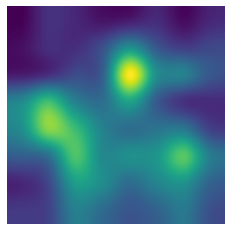

: 

In [17]:
import os
print(len(c))
count=0
for list1 in c:
    count=count+1
    for list2 in list1:
        print(list2.shape,count)
        location='textvar_encoder'
        if os.path.exists(location)==False:
            os.makedirs(location)
        dirname=len(os.listdir('/media/labuser/sdb/Controlpromptediting/diffscaler_multimodal/'+location))
        loc=os.path.join('/media/labuser/sdb/Controlpromptediting/diffscaler_multimodal/'+location, str(dirname)+'.png')
        # image.save(os.path.join()
        image=save_image(list2, loc)


torch.Size([1, 16, 16]) 33
(256, 256)
/media/labuser/sdb/Controlpromptediting/diffscaler_multimodal/textvar_decoder/0.png
torch.Size([1, 32, 32]) 33
(256, 256)
/media/labuser/sdb/Controlpromptediting/diffscaler_multimodal/textvar_decoder/1.png
torch.Size([1, 64, 64]) 33
(256, 256)
/media/labuser/sdb/Controlpromptediting/diffscaler_multimodal/textvar_decoder/2.png
torch.Size([1, 64, 64]) 33
(256, 256)
/media/labuser/sdb/Controlpromptediting/diffscaler_multimodal/textvar_decoder/3.png
torch.Size([1, 16, 16]) 34
(256, 256)
/media/labuser/sdb/Controlpromptediting/diffscaler_multimodal/textvar_decoder/4.png
torch.Size([1, 32, 32]) 34
(256, 256)
/media/labuser/sdb/Controlpromptediting/diffscaler_multimodal/textvar_decoder/5.png
torch.Size([1, 64, 64]) 34
(256, 256)
/media/labuser/sdb/Controlpromptediting/diffscaler_multimodal/textvar_decoder/6.png
torch.Size([1, 64, 64]) 34
(256, 256)
/media/labuser/sdb/Controlpromptediting/diffscaler_multimodal/textvar_decoder/7.png
torch.Size([1, 16, 16]) 

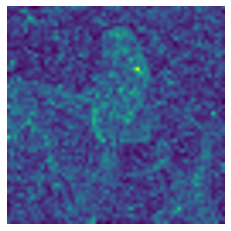

In [16]:
for list1 in d:
    count=count+1
    for list2 in list1:
        print(list2.shape,count)
        location='textvar_decoder'
        if os.path.exists(location)==False:
            os.makedirs(location)
        dirname=len(os.listdir('/media/labuser/sdb/Controlpromptediting/diffscaler_multimodal/'+location))
        loc=os.path.join('/media/labuser/sdb/Controlpromptediting/diffscaler_multimodal/'+location, str(dirname)+'.png')
        # image.save(os.path.join()
        image=save_image(list2, loc)
